# Viewing metrics - Descriptive evaluation

Importing libraries

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(dplyr)
library(gt)
library(RColorBrewer)
library(scales)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




Broad overview of STR distribution

In [2]:
# CSV import
df_desc_analysis <- read_csv("results/stats_group_repeat_alleles_meanallele_extension_quartiles_sd.csv")

# Normalizing the Number of Observations by the total number of cases and controls
df_desc_analysis <- df_desc_analysis %>%
  mutate(
    Numero_Observacoes_norm = ifelse(
      group == "case", Number_Observations / 32,
      ifelse(group == "control", Number_Observations / 136, NA)
    )
  )
# Viewing the dataframe
View(df_desc_analysis)


Rows: 2 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): group
dbl (16): Mean_Allele1, SD_Allele1, Q1_Allele1, Median_Allele1, Q3_Allele1, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


group,Mean_Allele1,SD_Allele1,Q1_Allele1,Median_Allele1,Q3_Allele1,Mean_Allele2,SD_Allele2,Q1_Allele2,Median_Allele2,Q3_Allele2,Mean_ExtensionSize,SD_ExtensionSize,Q1_ExtensionSize,Median_ExtensionSize,Q3_ExtensionSize,Number_Observations,Numero_Observacoes_norm
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
case,-0.4041409,3.897004,0,0,0,9.511461,40.51782,0,0,0,6.165623,23.88871,0,0,3,2849848,89057.75
control,-0.4043222,3.913657,0,0,0,9.976600,36.79860,0,0,0,6.556736,22.30500,0,0,5,12111593,89055.83


Conversion into a table for publication

In [3]:
# Pivoting to form the desired table:
df_long <- df_desc_analysis %>%
  pivot_longer(
    cols = -group,
    names_to = "Metric",
    values_to = "valor"
  )

df_wide <- df_long %>%
  pivot_wider(
    names_from = group,
    values_from = valor
  ) %>%
  rename(
    'Case Group' = case,
    'Control Group' = control
  )

# Translate metric names to English with proper formatting
df_wide <- df_wide %>%
  mutate(Metric = case_when(
    Metric == "Mean_Allele1" ~ "Mean (Allele 1)",
    Metric == "SD_Allele1" ~ "SD (Allele 1)",
    Metric == "Q1_Allele1" ~ "Q1 (Allele 1)",
    Metric == "Median_Allele1" ~ "Median (Allele 1)",
    Metric == "Q3_Allele1" ~ "Q3 (Allele 1)",
    Metric == "Mean_Allele2" ~ "Mean (Allele 2)",
    Metric == "SD_Allele2" ~ "SD (Allele 2)",
    Metric == "Q1_Allele2" ~ "Q1 (Allele 2)",
    Metric == "Median_Allele2" ~ "Median (Allele 2)",
    Metric == "Q3_Allele2" ~ "Q3 (Allele 2)",
    Metric == "Mean_ExtensionSize" ~ "Mean (Extension Size)",
    Metric == "SD_ExtensionSize" ~ "SD (Extension Size)",
    Metric == "Q1_ExtensionSize" ~ "Q1 (Extension Size)",
    Metric == "Median_ExtensionSize" ~ "Median (Extension Size)",
    Metric == "Q3_ExtensionSize" ~ "Q3 (Extension Size)",
    Metric == "Number_Observations" ~ "Total Observations",
    Metric == "Numero_Observacoes_norm" ~ "Normalized Observations",
    TRUE ~ Metric
  ))

# Create publication-ready table
tabela_gt <- gt(df_wide) %>%
  fmt_number(
    columns = -Metric,      
    decimals = 2,
    use_seps = TRUE           
  ) %>%
  # Add table title and subtitle (optional)
  tab_header(
    title = "Descriptive Statistics of STR Metrics",
    subtitle = "Comparison between Case and Control Groups"
  ) %>%
  # Style the column labels
  cols_label(
    Metric = "Metric",
    `Case Group` = "Case Group",
    `Control Group` = "Control Group"
  ) %>%
  # Add footnote (optional)
  tab_footnote(
    footnote = "SD: Standard Deviation; Q1: First Quartile; Q3: Third Quartile",
    locations = cells_column_labels(columns = Metric)
  )

# Save as HTML
gtsave(tabela_gt, "results/table_summary_desc.html")


## Genomic Distribution of Short Tandem Repeats Across Functional Regions

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ scales::col_factor() masks readr::col_factor()
✖ purrr::discard()     masks scales::discard()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 7 × 3
  region              n percent
  <fct>           <int>   <dbl>
1 intron          48792  54.7  
2 intergenic      32370  36.3  
3 promoter         5725   6.42 
4 three_prime_utr   943   1.06 
5 others            807   0.904
6 five_prime_utr    374   0.419
7 CDS               218   0.244


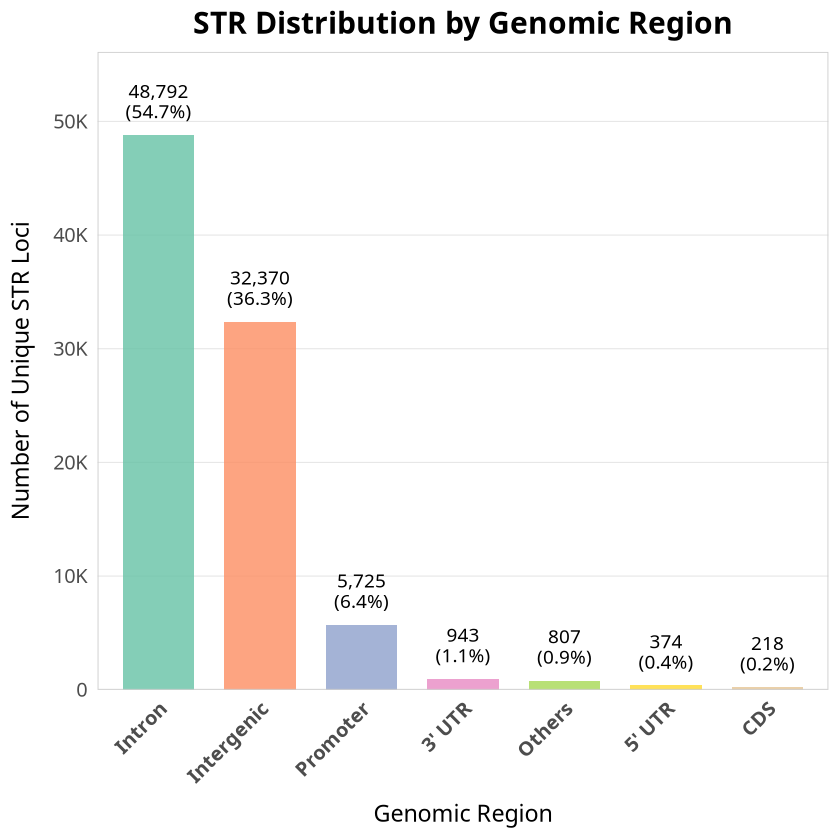

In [ ]:
# Read the data
strs_data <- read_csv("results/strs_by_locus_combo.csv")

# Count unique STR loci by region
strs_region_summary <- strs_data %>%
  distinct(locus, region) %>%
  count(region, name = "n") %>%
  mutate(percent = 100 * n / sum(n)) %>%
  arrange(desc(n)) %>%
  mutate(region = factor(region, levels = region))

# View the results
print(strs_region_summary)

# Create the plot
p <- ggplot(strs_region_summary, aes(x = region, y = n, fill = region)) +
  geom_bar(stat = "identity", alpha = 0.8, width = 0.7) +
  geom_text(
    aes(label = paste0(scales::comma(n), "\n(", round(percent, 1), "%)")),
    vjust = -0.5, size = 4, lineheight = 0.9  
  ) +
  labs(
    title = "STR Distribution by Genomic Region",
    x = "Genomic Region",
    y = "Number of Unique STR Loci"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12, face = "bold"),
    axis.text.y = element_text(size = 12),
    legend.position = "none",
    axis.title.x = element_text(size = 14, margin = margin(t = 10)),
    axis.title.y = element_text(size = 14, margin = margin(r = 10)),
    panel.grid.major.y = element_line(color = "grey90", linewidth = 0.3),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "grey80", fill = NA, linewidth = 0.5)
  ) +
  scale_y_continuous(
    labels = label_number(scale_cut = cut_short_scale()),  # ALTERADO: K, M format
    expand = expansion(mult = c(0, 0.15))
  ) +
  scale_fill_brewer(palette = "Set2") +
  scale_x_discrete(labels = function(x) {
    case_when(
      x == "five_prime_utr" ~ "5' UTR",
      x == "three_prime_utr" ~ "3' UTR",
      x == "intergenic" ~ "Intergenic",
      x == "intron" ~ "Intron",
      x == "promoter" ~ "Promoter",
      x == "CDS" ~ "CDS",
      x == "others" ~ "Others",
      TRUE ~ x
    )
  })

print(p)

ggsave("results/barplot_region.png", plot = p, width = 10, height = 6, dpi = 600, bg = "white")


# Evaluation of the distribution of the major allele of STRS by region

Overview

In [5]:
strs_region <- read_csv("results/strs_by_region_combo.csv")
df_tibble <- as_tibble(strs_region)
head(strs_region)

Rows: 14 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): region, group
dbl (12): n, total, mean_allele1, median_allele1, sd_allele1, min_allele1, m...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


region,group,n,total,mean_allele1,median_allele1,sd_allele1,min_allele1,max_allele1,mean_allele2,median_allele2,sd_allele2,min_allele2,max_allele2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intron,control,6626669,8185887,-0.4050839,0,3.987590,-71,40,9.864500,0,42.42264,0,18249.10
intergenic,control,4393642,5427454,-0.4267468,0,3.881804,-71,38,9.293655,0,26.61409,0,2186.14
intron,case,1559218,8185887,-0.4053190,0,3.969166,-68,38,9.385827,0,48.21185,0,22012.80
intergenic,case,1033812,5427454,-0.4238815,0,3.864823,-69,34,8.786687,0,26.09357,0,1860.23
promoter,control,777501,960444,-0.3565036,0,3.765882,-60,38,12.303182,0,31.85784,0,2727.31
promoter,case,182943,960444,-0.3597716,0,3.757750,-55,38,12.016164,0,31.76961,0,1879.20


Distribution between genomic regions and groups

Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in scale_x_log10(breaks = c(1, 10, 100, 1000, 10000), labels = label_number(scale_cut = cut_short_scale())):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 11627446 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message in scale_x_log10(breaks = c(1, 10, 100, 1000, 10000), labels = label_number(scale_cut = cut_short_scale())):
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 11627446 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


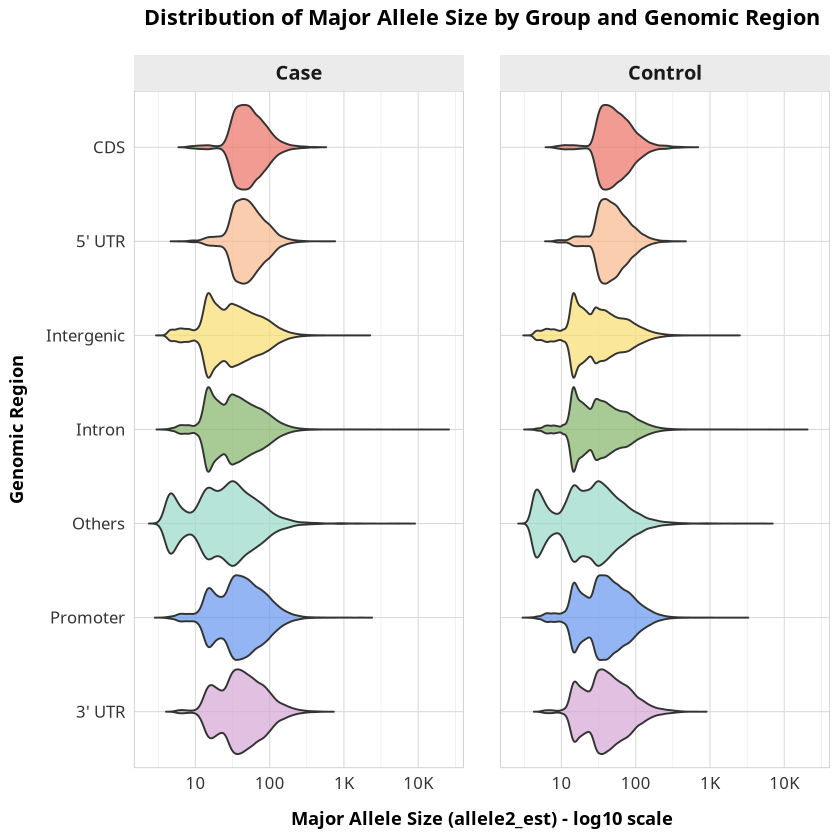

In [ ]:
# Read the data
df <- read_csv("results/strs_by_locus_combo.csv")

# Filter out zeros for log transformation and set factor order
df_plot <- df %>%
  mutate(region = factor(region, levels = c(
    "three_prime_utr", "promoter", "others", "intron", 
    "intergenic", "five_prime_utr", "CDS"
  )))

# Create the violin plot with log scale
p <- ggplot(df_plot, aes(x = allele2_est, y = region, fill = region)) +
  # Add violin plot
  geom_violin(trim = FALSE, alpha = 0.7, scale = "width") +
  
  # Log scale for x-axis
  scale_x_log10(
    breaks = c(1, 10, 100, 1000, 10000),
    labels = label_number(scale_cut = cut_short_scale())  # altered to K, M format
  ) +
  
  # Facet by group
  facet_wrap(~ group, ncol = 2,
             labeller = labeller(group = c(case = "Case", control = "Control"))) +
  
  # Set color palette (more vibrant colors)
  scale_fill_manual(values = c(
    "three_prime_utr" = "#D4A5D4",   # light purple
    "promoter" = "#6495ED",          # cornflower blue
    "others" = "#98D8C8",            # turquoise
    "intron" = "#82B366",            # green
    "intergenic" = "#F7DC6F",        # yellow
    "five_prime_utr" = "#F8B88B",    # peach
    "CDS" = "#EC7063"                # coral
  )) +
  
  # Labels in English
  labs(
    title = "Distribution of Major Allele Size by Group and Genomic Region",
    x = "Major Allele Size (allele2_est) - log10 scale",
    y = "Genomic Region"
  ) +
  
  # Clean region names for display
  scale_y_discrete(labels = c(
    "three_prime_utr" = "3' UTR",
    "promoter" = "Promoter",
    "others" = "Others",
    "intron" = "Intron",
    "intergenic" = "Intergenic",
    "five_prime_utr" = "5' UTR",
    "CDS" = "CDS"
  )) +
  
  # Theme adjustments
  theme_minimal(base_size = 12) +
  theme(
    # Remove legend
    legend.position = "none",
    
    # Grid
    panel.grid.major.x = element_line(color = "grey85", linewidth = 0.3),
    panel.grid.minor.x = element_line(color = "grey92", linewidth = 0.2),
    panel.grid.major.y = element_line(color = "grey85", linewidth = 0.3),
    panel.grid.minor.y = element_blank(),
    
    # Facet strips
    strip.text = element_text(size = 12, face = "bold"),
    strip.background = element_rect(fill = "grey92", color = NA),
    
    # Axes
    axis.text = element_text(size = 10, color = "grey20"),
    axis.text.y = element_text(size = 10),
    axis.title = element_text(size = 11, face = "bold"),
    axis.title.x = element_text(margin = margin(t = 10)),
    axis.title.y = element_text(margin = margin(r = 10)),
    
    # Plot title
    plot.title = element_text(size = 13, hjust = 0.5, face = "bold", 
                              margin = margin(b = 15)),
    
    # Background
    panel.background = element_rect(fill = "white", color = NA),
    plot.background = element_rect(fill = "white", color = NA),
    
    # Panel spacing and border
    panel.spacing = unit(1.5, "lines"),
    panel.border = element_rect(color = "grey80", fill = NA, linewidth = 0.5)
  )

# Display the plot
print(p)

# Save the plot
ggsave("results/violin_plot_allele_distribution_log.png", 
       plot = p, 
       width = 12, 
       height = 7, 
       dpi = 600, 
       bg = "white")


Complementary table to supplementar section

In [ ]:
# Read the data
df_table <- read_csv("results/strs_by_locus_combo.csv")

# Calculate descriptive statistics by region and group
summary_stats <- df_table %>%
  group_by(region, group) %>%
  summarise(
    N = n(),
    Mean = mean(allele2_est, na.rm = TRUE),
    SD = sd(allele2_est, na.rm = TRUE),
    Median = median(allele2_est, na.rm = TRUE),
    Q1 = quantile(allele2_est, 0.25, na.rm = TRUE),
    Q3 = quantile(allele2_est, 0.75, na.rm = TRUE),
    Min = min(allele2_est, na.rm = TRUE),
    Max = max(allele2_est, na.rm = TRUE),
    .groups = "drop"
  )

# Pivot to wide format for comparison
summary_wide <- summary_stats %>%
  pivot_longer(
    cols = c(N, Mean, SD, Median, Q1, Q3, Min, Max),
    names_to = "Metric",
    values_to = "value"
  ) %>%
  pivot_wider(
    names_from = group,
    values_from = value
  ) %>%
  rename(
    'Genomic Region' = region,
    'Case' = case,
    'Control' = control
  ) %>%
  mutate(
    `Genomic Region` = case_when(
      `Genomic Region` == "CDS" ~ "CDS",
      `Genomic Region` == "five_prime_utr" ~ "5' UTR",
      `Genomic Region` == "intergenic" ~ "Intergenic",
      `Genomic Region` == "intron" ~ "Intron",
      `Genomic Region` == "others" ~ "Others",
      `Genomic Region` == "promoter" ~ "Promoter",
      `Genomic Region` == "three_prime_utr" ~ "3' UTR",
      TRUE ~ `Genomic Region`
    ),
    Metric = factor(Metric, levels = c("N", "Mean", "SD", "Median", "Q1", "Q3", "Min", "Max"))
  ) %>%
  arrange(`Genomic Region`, Metric)

# Create publication-ready table
table_gt <- summary_wide %>%
  gt(groupname_col = "Genomic Region") %>%
  
  # Format numbers - N as integer
  fmt_number(
    columns = c(Case, Control),
    rows = Metric == "N",
    decimals = 0,
    use_seps = TRUE
  ) %>%
  
  # Format other metrics with 2 decimals
  fmt_number(
    columns = c(Case, Control),
    rows = Metric != "N",
    decimals = 2,
    use_seps = TRUE
  ) %>%
  
  # Column labels
  cols_label(
    Metric = "Metric",
    Case = "Case",
    Control = "Control"
  ) %>%
  
  # Add title and subtitle
  tab_header(
    title = "Descriptive Statistics of Major Allele Size by Genomic Region",
    subtitle = "Comparison between Case and Control Groups"
  ) %>%
  
  # Add footnote
  tab_footnote(
    footnote = "SD: Standard Deviation; Q1: First Quartile; Q3: Third Quartile",
    locations = cells_column_labels(columns = Metric)
  ) %>%
  
  # Style the table
  tab_style(
    style = cell_text(weight = "bold"),
    locations = cells_row_groups()
  ) %>%
  
  tab_style(
    style = cell_fill(color = "grey95"),
    locations = cells_row_groups()
  ) %>%
  
  # Style column labels
  tab_style(
    style = cell_text(weight = "bold"),
    locations = cells_column_labels()
  ) %>%
  
  # Add borders
  tab_options(
    table.border.top.style = "solid",
    table.border.bottom.style = "solid",
    heading.border.bottom.style = "solid",
    column_labels.border.top.style = "solid",
    column_labels.border.bottom.style = "solid",
    table_body.border.bottom.style = "solid",
    row_group.border.top.style = "solid",
    row_group.border.bottom.style = "solid"
  )

# Display the table
print(table_gt)

# Save as HTML
gtsave(table_gt, "results/table_allele_stats_by_region.html")

# Save raw data as CSV
write_csv(summary_wide, "results/table_allele_stats_by_region.csv")


Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<div id="gnncecerrg" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#gnncecerrg table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#gnncecerrg thead, #gnncecerrg tbody, #gnncecerrg tfoot, #gnncecerrg tr, #gnncecerrg td, #gnncecerrg th {
  border-style: none;
}

#gnncecerrg p {
  margin: 0;
  padding: 0;
}

#gnncecerrg .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b

# Genomic Distribution of Short Tandem Repeats Across Chromossomes


In [6]:
strs_RU <- read_csv("results/strs_by_repeatunit_combo.csv")
df_tibble <- as_tibble(strs_RU)
head(strs_RU) #N representa a quantidade de observação naquele cromossomo em específico

Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): repeat_unit, groups_present
dbl (3): n_case, n_control, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


repeat_unit,n_case,n_control,total,groups_present
<chr>,<dbl>,<dbl>,<dbl>,<chr>
AT,484035,2057144,2541179,"case, control"
T,442502,1880607,2323109,"case, control"
A,428609,1821584,2250193,"case, control"
GT,334205,1420376,1754581,"case, control"
AC,332319,1412362,1744681,"case, control"
C,224072,952151,1176223,"case, control"


Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


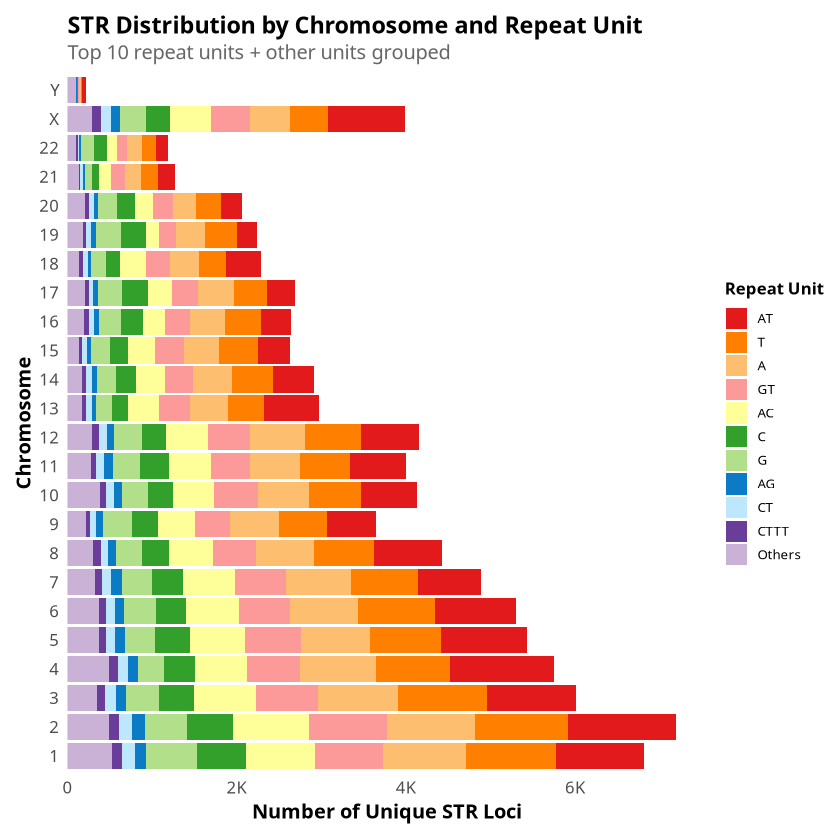

In [11]:
# Read data
strs_data <- read_csv("results/strs_by_locus_combo.csv")

# Count unique STR loci by chromosome and repeat unit
strs_chrom <- strs_data %>%
  distinct(locus, chrom, repeat_unit) %>%
  count(chrom, repeat_unit, name = "n")

# Filter only chromosomes 1-22 + X, Y
desired_chromosomes <- c(1:22, "X", "Y") %>% as.character()

# Adjust and order chromosomes for plotting
strs_chrom <- strs_chrom %>%
  filter(chrom %in% desired_chromosomes) %>%
  mutate(
    chrom = factor(chrom, levels = desired_chromosomes)
  )

# Group repeat units - keep top N and group others
top_repeat_units <- strs_chrom %>%
  group_by(repeat_unit) %>%
  summarise(total = sum(n)) %>%
  arrange(desc(total))

# Define how many units to keep (adjust as needed)
n_to_keep <- 10
units_to_keep <- top_repeat_units$repeat_unit[1:n_to_keep]

# Define colors to be used in the plot
RU_colors <- c('#e31a1c', '#ff7f00', '#fdbf6f', '#fb9a99', '#ffff99',
               '#33a02c', '#b2df8a', '#0b7bc5', '#bce7fd', 
               '#6a3d9a', '#cab2d6')

# Apply grouping
strs_chrom_grouped <- strs_chrom %>%
  mutate(
    repeat_unit_grouped = ifelse(
      repeat_unit %in% units_to_keep,  # CORRIGIDO: era unidades_manter
      as.character(repeat_unit), 
      "Others"
    )
  ) %>%
  # Ensure "Others" is the last level
  mutate(
    repeat_unit_grouped = factor(
      repeat_unit_grouped, 
      levels = c(units_to_keep, "Others")
    )
  )

# Create complete grid with only desired chromosomes
all_chromosomes <- expand.grid(
  chrom = factor(desired_chromosomes, levels = desired_chromosomes),
  repeat_unit_grouped = levels(strs_chrom_grouped$repeat_unit_grouped)
)

# Ensure complete dataframe filling zeros where there is no data
df_complete <- all_chromosomes %>%
  left_join(strs_chrom_grouped, by = c("chrom", "repeat_unit_grouped")) %>%
  mutate(n = ifelse(is.na(n), 0, n)) %>%
  # Group by chrom and repeat_unit_grouped to sum n
  group_by(chrom, repeat_unit_grouped) %>%
  summarise(n = sum(n), .groups = "drop")

# FUNCTION TO FORMAT NUMBERS IN K/M
format_number <- function(x) {
  case_when(
    x >= 1e6 ~ paste0(round(x/1e6, 1), "M"),
    x >= 1e3 ~ paste0(round(x/1e3, 1), "K"),
    TRUE ~ as.character(x)
  )
}

# Create horizontal stacked bar plot WITH LEGEND ON THE RIGHT
p <- ggplot(df_complete, aes(x = chrom, y = n, fill = repeat_unit_grouped)) +
  geom_col() +
  coord_flip() +
  scale_x_discrete(drop = FALSE) +
  scale_fill_manual(values = RU_colors, drop = FALSE) +
  # FORMAT Y-AXIS IN K/M
  scale_y_continuous(
    labels = function(x) format_number(x),
    expand = expansion(mult = c(0, 0.05))
  ) +
  labs(
    title = "STR Distribution by Chromosome and Repeat Unit",
    subtitle = paste("Top", n_to_keep, "repeat units + other units grouped"),  # CORRIGIDO: era n_manter
    x = "Chromosome",
    y = "Number of Unique STR Loci",
    fill = "Repeat Unit"
  ) +
  theme_minimal() +
  theme(
    # LEGEND ON THE RIGHT
    legend.position = "right",
    legend.direction = "vertical",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 8),
    legend.key.size = unit(0.6, "lines"),
    legend.key.height = unit(0.5, "cm"),
    legend.key.width = unit(0.5, "cm"),
    legend.margin = margin(0, 0, 0, 0),
    legend.spacing.y = unit(0.1, "cm"),
    
    # ADJUST MARGINS TO COMPENSATE FOR LEGEND
    plot.margin = margin(10, 10, 10, 10),
    plot.title = element_text(size = 14, face = "bold", margin = margin(b = 3)),
    plot.subtitle = element_text(size = 12, color = "gray40", margin = margin(b = 5)),
    
    # REMOVE GRIDLINES
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    
    # Axis elements
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold"),
    
    # Clean background
    panel.background = element_rect(fill = "white", color = NA),
    plot.background = element_rect(fill = "white", color = NA)
  ) +
  guides(fill = guide_legend(
    ncol = 1,           # One column for vertical legend
    byrow = TRUE,
    label.position = "right"
  ))

print(p)

# SAVE THE PLOT
ggsave("results/barplot_chromosome_repeat_unit.png", 
       plot = p,
       width = 14,
       height = 8,
       dpi = 600,
       bg = "white")


Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 455 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (1): size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


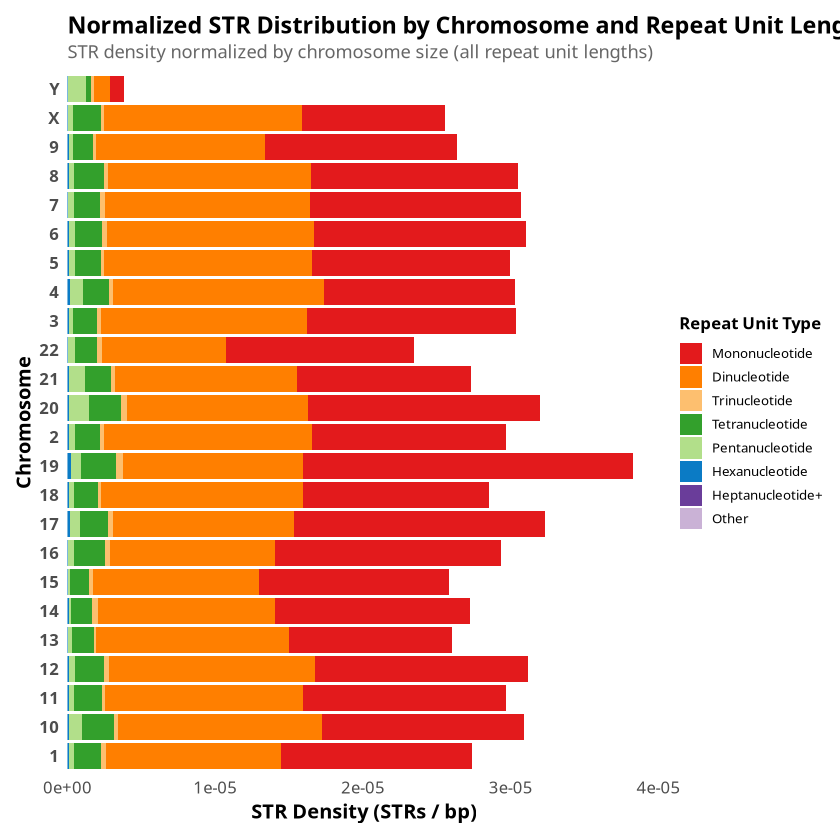

In [13]:
# Read data
strs_data <- read_csv("results/strs_by_locus_combo.csv")

# Read chromossome length
genome_sizes <- read_tsv("genome.txt", col_names = c("chr", "size"))

# Prepare chromossome size
genome_sizes_clean <- genome_sizes %>%
  filter(str_detect(chr, "^chr[0-9XY]+$")) %>%
  mutate(chrom = str_remove(chr, "^chr")) %>%
  select(chrom, size)

# Count unique loci and sort by repeat unit size
strs_chrom <- strs_data %>%
  distinct(locus, chrom, repeat_unit) %>%
  mutate(
    repeat_type = case_when(
      nchar(repeat_unit) == 1 ~ "Mononucleotide",
      nchar(repeat_unit) == 2 ~ "Dinucleotide",
      nchar(repeat_unit) == 3 ~ "Trinucleotide",
      nchar(repeat_unit) == 4 ~ "Tetranucleotide",
      nchar(repeat_unit) == 5 ~ "Pentanucleotide",
      nchar(repeat_unit) == 6 ~ "Hexanucleotide",
      nchar(repeat_unit) >= 7 ~ "Heptanucleotide+",
      TRUE ~ "Other"
    ),
    repeat_type = factor(repeat_type, levels = c(
      "Mononucleotide", "Dinucleotide", "Trinucleotide", 
      "Tetranucleotide", "Pentanucleotide", "Hexanucleotide", 
      "Heptanucleotide+", "Other"
    ))
  ) %>%
  count(chrom, repeat_type, name = "n")

# Filter only chromosomes 1-22 + X, Y
cromossomos_desejados <- c(1:22, "X", "Y") %>% as.character()

# Adjust and arrange chromosomes
strs_chrom <- strs_chrom %>%
  filter(chrom %in% cromossomos_desejados) %>%
  mutate(chrom = factor(chrom, levels = cromossomos_desejados))

# NORMALIZE by chromosome size
strs_chrom_norm <- strs_chrom %>%
  left_join(genome_sizes_clean, by = "chrom") %>%
  mutate(
    n_normalized = n / size  # STRs per base
  )

# Create complete grid
repeat_levels <- levels(strs_chrom_norm$repeat_type)
todos_cromossomos <- expand.grid(
  chrom = factor(cromossomos_desejados, levels = cromossomos_desejados),
  repeat_type = factor(repeat_levels, levels = repeat_levels)
)

# Fill in zeros where there is no data
df_completo <- todos_cromossomos %>%
  left_join(strs_chrom_norm, by = c("chrom", "repeat_type")) %>%
  mutate(n_normalized = ifelse(is.na(n_normalized), 0, n_normalized)) %>%
  group_by(chrom, repeat_type) %>%
  summarise(n_normalized = sum(n_normalized), .groups = "drop")

# Defines colors (color spectrum)
repeat_colors <- c(
  "Mononucleotide" = "#e31a1c",    # red
  "Dinucleotide" = "#ff7f00",      # orange
  "Trinucleotide" = "#fdbf6f",     # light orange
  "Tetranucleotide" = "#33a02c",   # green
  "Pentanucleotide" = "#b2df8a",   # light green
  "Hexanucleotide" = "#0b7bc5",    # blue
  "Heptanucleotide+" = "#6a3d9a",  # purple
  "Other" = "#cab2d6"              # light purple
)

# Create the NORMALIZED chart
p <- ggplot(df_completo, aes(x = chrom, y = n_normalized, fill = repeat_type)) +
  geom_col() +
  coord_flip() +
  scale_x_discrete(drop = FALSE) +
  scale_fill_manual(values = repeat_colors, drop = FALSE) +
  scale_y_continuous(
    labels = scientific_format(digits = 2),
    expand = expansion(mult = c(0, 0.05))
  ) +
  labs(
    title = "Normalized STR Distribution by Chromosome and Repeat Unit Length",
    subtitle = "STR density normalized by chromosome size (all repeat unit lengths)",
    x = "Chromosome",
    y = "STR Density (STRs / bp)",
    fill = "Repeat Unit Type"
  ) +
  theme_minimal() +
  theme(
    legend.position = "right",
    legend.direction = "vertical",
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 8),
    legend.key.size = unit(0.6, "lines"),
    legend.key.height = unit(0.5, "cm"),
    legend.key.width = unit(0.5, "cm"),
    legend.margin = margin(0, 0, 0, 0),
    legend.spacing.y = unit(0.1, "cm"),
    
    plot.margin = margin(10, 10, 10, 10),
    plot.title = element_text(size = 14, face = "bold", margin = margin(b = 3)),
    plot.subtitle = element_text(size = 11, color = "gray40", margin = margin(b = 5)),
    
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    
    axis.text = element_text(size = 10),
    axis.text.y = element_text(face = "bold"),
    axis.title = element_text(size = 12, face = "bold"),
    
    panel.background = element_rect(fill = "white", color = NA),
    plot.background = element_rect(fill = "white", color = NA)
  ) +
  guides(fill = guide_legend(
    ncol = 1,
    byrow = TRUE,
    label.position = "right"
  ))

print(p)

# SAVE THE PLOT
ggsave("results/barplot_chromosome_all_repeats_normalized.png", 
       plot = p,
       width = 14,
       height = 8,
       dpi = 600,
       bg = "white")


In [14]:
# Read the data
strs_data <- read_csv("results/strs_by_locus_combo.csv")
strs_repeat_summary <- read_csv("results/strs_by_repeatunit_combo.csv")

# Read chromosome sizes
genome_sizes <- read_tsv("genome.txt", col_names = c("chr", "size"))

# Prepare chromosome sizes
genome_sizes_clean <- genome_sizes %>%
  filter(str_detect(chr, "^chr[0-9XY]+$")) %>%
  mutate(chrom = str_remove(chr, "^chr")) %>%
  select(chrom, size)

# Calculate total genome size (chr 1-22, X, Y)
cromossomos_desejados <- c(as.character(1:22), "X", "Y")  # Order: 1-22, then X, Y
genome_total_size <- genome_sizes_clean %>%
  filter(chrom %in% cromossomos_desejados) %>%
  summarise(total_size = sum(size)) %>%
  pull(total_size)

# Identify top 5 repeat units
top5_repeats <- strs_repeat_summary %>%
  arrange(desc(total)) %>%
  head(5) %>%
  pull(repeat_unit)

# Count unique STRs by chromosome and repeat unit (top 5 only)
strs_chrom_repeat <- strs_data %>%
  filter(repeat_unit %in% top5_repeats) %>%
  distinct(locus, chrom, repeat_unit) %>%
  count(chrom, repeat_unit, name = "n_loci")

# Filter main chromosomes and set factor levels for proper ordering
strs_chrom_repeat <- strs_chrom_repeat %>%
  filter(chrom %in% cromossomos_desejados) %>%
  mutate(chrom = factor(chrom, levels = cromossomos_desejados))

# Join with sizes and normalize
strs_table <- strs_chrom_repeat %>%
  left_join(genome_sizes_clean, by = "chrom") %>%
  mutate(
    density_per_mb = (n_loci / size) * 1e6  # STRs per Mb
  )

# Create pivot table for each repeat unit
table_list <- list()

for(ru in top5_repeats) {
  temp_table <- strs_table %>%
    filter(repeat_unit == ru) %>%
    select(chrom, n_loci, density_per_mb) %>%
    rename(
      Chromosome = chrom,
      !!paste0("Count_", ru) := n_loci,
      !!paste0("Density_", ru) := density_per_mb
    )
  
  table_list[[ru]] <- temp_table
}

# Join all tables
final_table <- table_list[[1]]
for(i in 2:length(table_list)) {
  final_table <- full_join(final_table, table_list[[i]], by = "Chromosome")
}

# Reorganize columns alternating Count and Density for each repeat unit
col_order <- c("Chromosome")
for(ru in top5_repeats) {
  col_order <- c(col_order, paste0("Count_", ru), paste0("Density_", ru))
}

final_table <- final_table %>%
  select(all_of(col_order)) %>%
  # Ensure proper chromosome ordering
  mutate(Chromosome = factor(Chromosome, levels = cromossomos_desejados)) %>%
  arrange(Chromosome)

# Add total row
total_row <- strs_table %>%
  group_by(repeat_unit) %>%
  summarise(
    total_count = sum(n_loci),
    avg_density = sum(n_loci) / genome_total_size * 1e6
  )

totals <- tibble(Chromosome = "Total")
for(ru in top5_repeats) {
  ru_total <- total_row %>% filter(repeat_unit == ru)
  totals[[paste0("Count_", ru)]] <- ru_total$total_count
  totals[[paste0("Density_", ru)]] <- ru_total$avg_density
}

# Convert Chromosome back to character before binding
final_table <- final_table %>%
  mutate(Chromosome = as.character(Chromosome))

final_table <- bind_rows(final_table, totals)

# Create GT publication-ready table
table_gt <- final_table %>%
  gt() %>%
  
  # Add spanners for each repeat unit
  tab_spanner(
    label = md(paste0("**", top5_repeats[1], "**")),
    columns = c(paste0("Count_", top5_repeats[1]), paste0("Density_", top5_repeats[1]))
  ) %>%
  tab_spanner(
    label = md(paste0("**", top5_repeats[2], "**")),
    columns = c(paste0("Count_", top5_repeats[2]), paste0("Density_", top5_repeats[2]))
  ) %>%
  tab_spanner(
    label = md(paste0("**", top5_repeats[3], "**")),
    columns = c(paste0("Count_", top5_repeats[3]), paste0("Density_", top5_repeats[3]))
  ) %>%
  tab_spanner(
    label = md(paste0("**", top5_repeats[4], "**")),
    columns = c(paste0("Count_", top5_repeats[4]), paste0("Density_", top5_repeats[4]))
  ) %>%
  tab_spanner(
    label = md(paste0("**", top5_repeats[5], "**")),
    columns = c(paste0("Count_", top5_repeats[5]), paste0("Density_", top5_repeats[5]))
  ) %>%
  
  # Rename columns to Count and Density
  cols_label(
    .list = setNames(
      rep(c("Count", "Density (per Mb)"), 5),
      unlist(lapply(top5_repeats, function(ru) c(paste0("Count_", ru), paste0("Density_", ru))))
    )
  ) %>%
  
  # Format numbers - Count as integer
  fmt_number(
    columns = starts_with("Count_"),
    decimals = 0,
    use_seps = TRUE
  ) %>%
  
  # Format Density with 2 decimals
  fmt_number(
    columns = starts_with("Density_"),
    decimals = 2,
    use_seps = TRUE
  ) %>%
  
  # Title
  tab_header(
    title = "STR Distribution and Density by Chromosome",
    subtitle = "Top 5 most abundant repeat units with absolute counts and density per megabase"
  ) %>%
  
  # Footnote
  tab_footnote(
    footnote = "Density calculated as number of unique STR loci per megabase (Mb) of chromosome length",
    locations = cells_column_labels(columns = starts_with("Density_"))
  ) %>%
  
  # Style Total row
  tab_style(
    style = list(
      cell_fill(color = "grey90"),
      cell_text(weight = "bold")
    ),
    locations = cells_body(rows = Chromosome == "Total")
  ) %>%
  
  # Style header
  tab_style(
    style = cell_text(weight = "bold"),
    locations = cells_column_labels()
  ) %>%
  
  # Borders
  tab_options(
    table.border.top.style = "solid",
    table.border.bottom.style = "solid",
    heading.border.bottom.style = "solid",
    column_labels.border.top.style = "solid",
    column_labels.border.bottom.style = "solid",
    table_body.border.bottom.style = "solid"
  )

# Display
print(table_gt)

# Save HTML
gtsave(table_gt, "results/supplementary_table_str_density_top5.html")

# Save CSV
write_csv(final_table, "results/supplementary_table_str_density_top5.csv")

# Print summary
cat("\nTop 5 Repeat Units:\n")
print(strs_repeat_summary %>% head(5) %>% select(repeat_unit, total))
cat("\nTotal genome size (chr 1-22, X, Y):", format(genome_total_size, big.mark = ","), "bp\n")


Rows: 14961441 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): locus, sample, group, region, chrom, repeat_unit
dbl (5): start, end, allele1_est, allele2_est, depth

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 200 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): repeat_unit, groups_present
dbl (3): n_case, n_control, total

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 455 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): chr
dbl (1): size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types 

<div id="nxworbxxyb" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
  <style>#nxworbxxyb table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#nxworbxxyb thead, #nxworbxxyb tbody, #nxworbxxyb tfoot, #nxworbxxyb tr, #nxworbxxyb td, #nxworbxxyb th {
  border-style: none;
}

#nxworbxxyb p {
  margin: 0;
  padding: 0;
}

#nxworbxxyb .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  b